# Part A

Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading dataset and checking the data types

In [4]:
energy_og = pd.read_csv('energydata_complete.csv')


In [5]:
print (energy_og.dtypes)

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


In [6]:
energy = pd.read_csv('energydata_complete.csv')

# To check the number of missing cells in the dataframe. There are no missing values.

In [7]:
energy.isnull().values.ravel().sum()

0

In [8]:
print(energy)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00         430      50  20.133333  48.00

In [9]:
print(energy.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

# Box Plots for outlier detection

C:\Users\Abhinav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


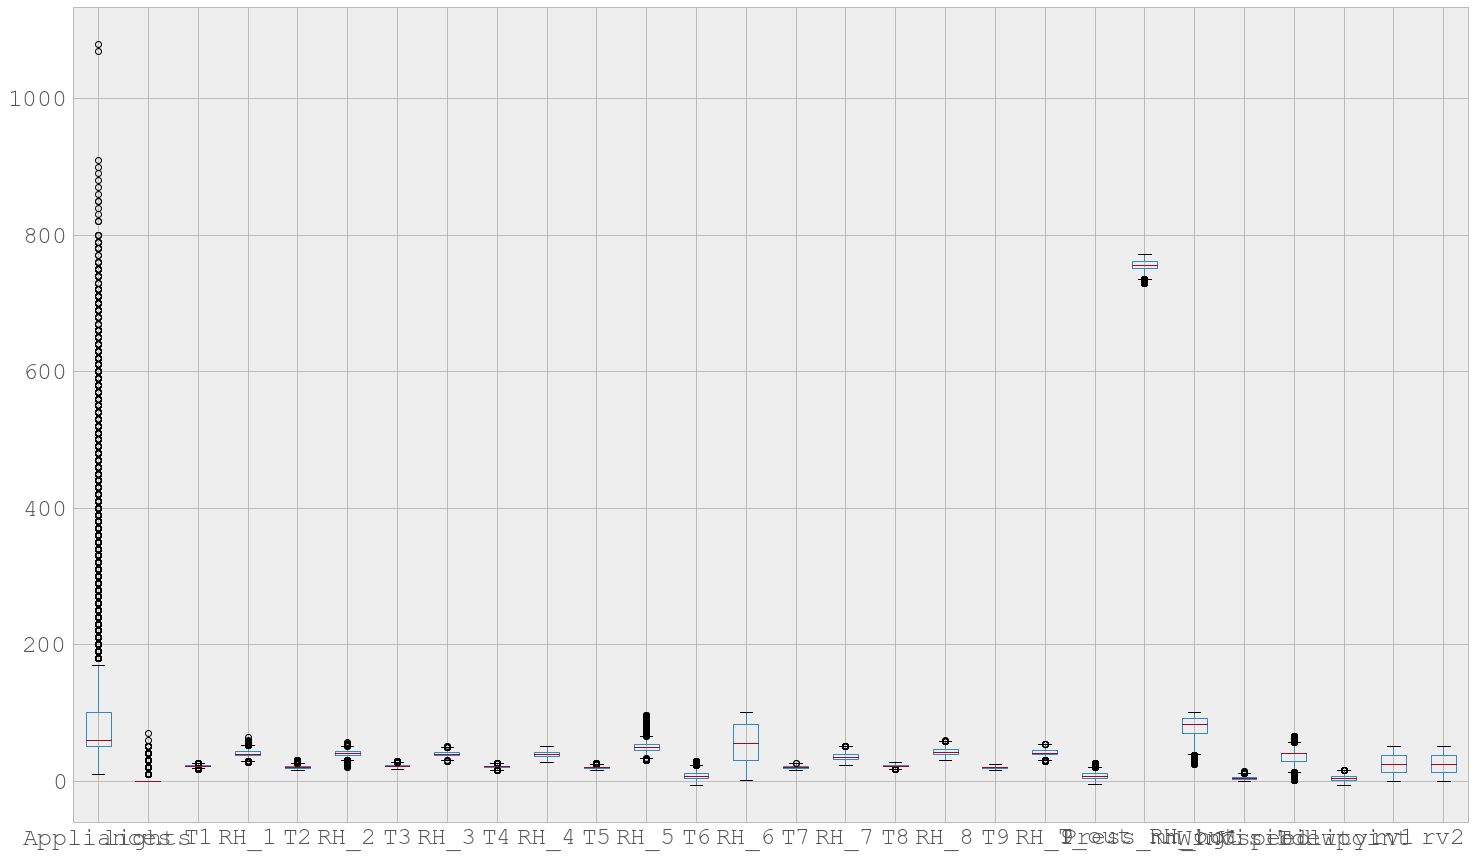

In [10]:
pd.options.display.mpl_style = 'default'
fig = energy.boxplot()


fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.xticks(size = 25)
plt.yticks(size = 25)

fig.savefig('Boxplot.png', dpi=100)


# Histogram of all features

Current size: [6.0, 4.0]


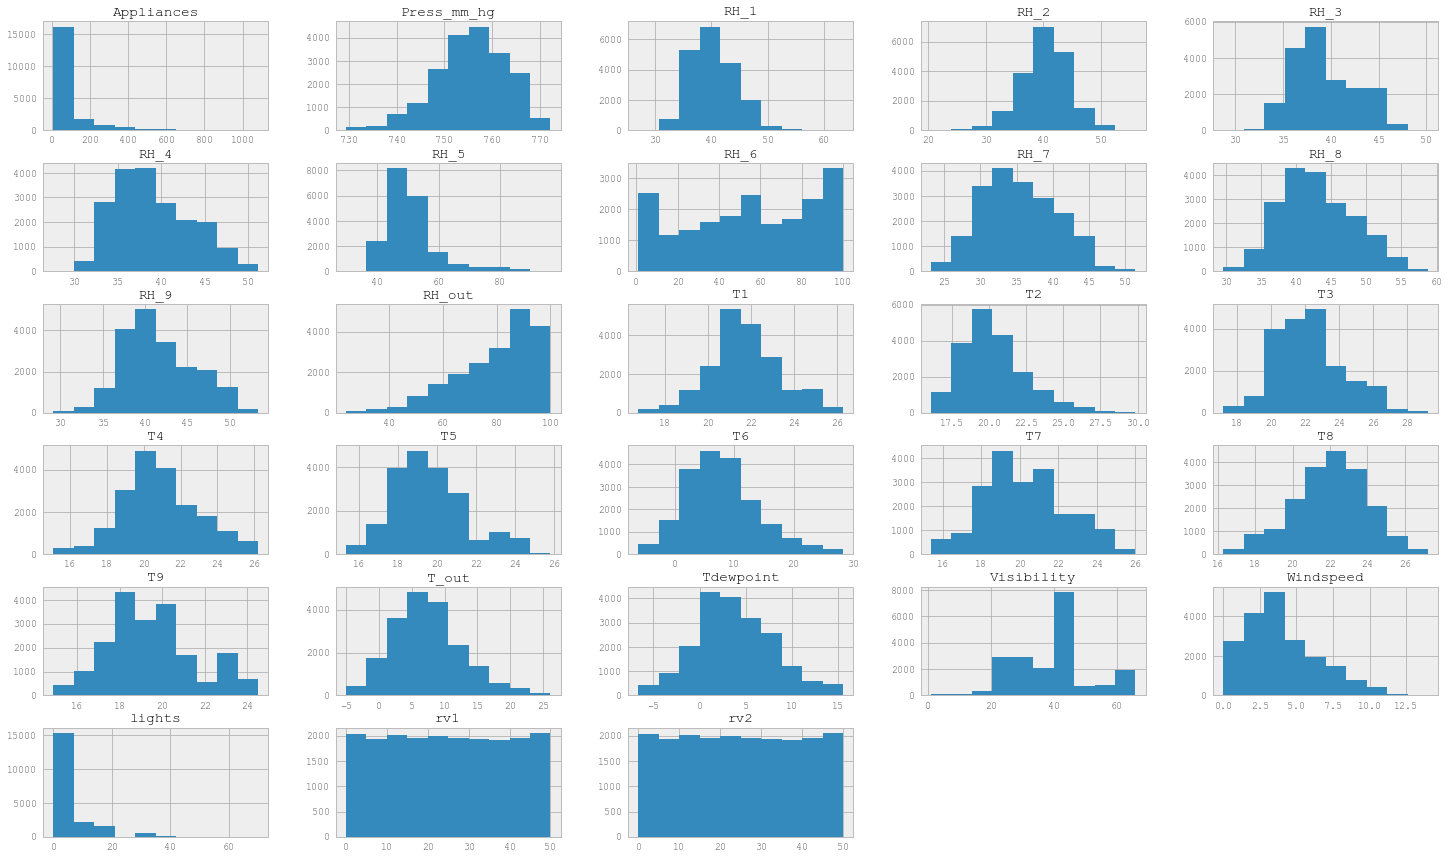

In [11]:
#fig2 = energy.hist()
fig_size = plt.rcParams["figure.figsize"]
 
print ("Current size:", fig_size)
 
# Set figure width to x and height to y
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
fig2 = energy.hist()
plt.savefig('Histogram.png', dpi=100)

# Heatmap for Correlation

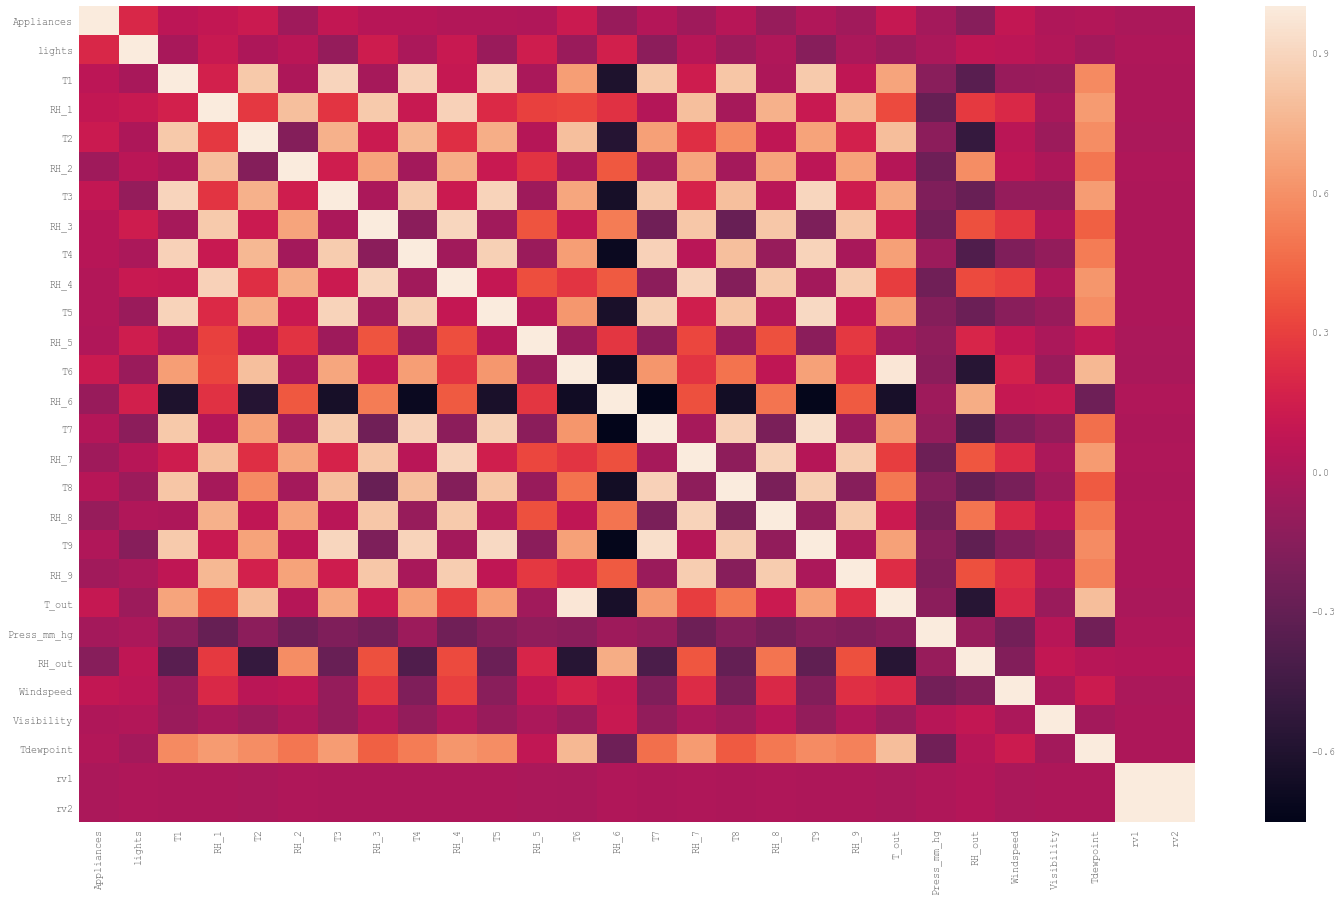

In [12]:
corr_matrix = energy.corr()
sns.heatmap(corr_matrix)

There is a positive correlation between the energy consumption of appliances and lights (0.197). The second largest  positivecorrelation is between appliances and T2. For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air temperature differences between rooms. For example, a positive correlationis found with T1 and T3. The plot shows that the positive correlation with the appliances is between the outdoortemperature. There is also a negative correlation between the appliances and outdoor humidity/RH6 (−.15). Plot also shows positive correlations between the consumption of appliances and T7, T8 and T9 being 0.025, 0.04 and 0.01 respectively.The highest correlation between the energy consumption of appliances and NSM with a value of 0.22. A positivecorrelation of 0.10 is seen between appliances’ consumption andoutdoor temperature (Tout) that is, the higher temperatures, the higher the energy use by the appliances. Also there is a positive correlation with appliances’ consumption and wind speed (0.09),higher wind speeds correlate with higher energy consumption bythe appliances. A negative correlation of −0.15 was found with the RHout, and of −0.03 with pressure. Another important and inter-esting correlation is between the pressure and the wind speed.This relationship is negative (−0.23). The linear trend is with lower pressure the wind speed will be higher.

In [13]:
energy_og.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [14]:
# Function to get column names which have correlation more than 0.8
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = energy.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(col_corr)            

In [15]:
corr_matrix.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [16]:
correlation(energy,0.8)

{'T4', 'T5', 'T7', 'T2', 'RH_4', 'RH_3', 'T6', 'RH_9', 'T_out', 'RH_8', 'RH_7', 'T9', 'rv2', 'T8', 'T3'}


In [17]:
#Getting the correlation based on pearson coefficient and listing them based on absolute values. 
from scipy.stats.stats import pearsonr
features = energy_og.iloc[:,2:].columns.tolist()
target = energy_og.iloc[:,1].name
correlations = {}
for f in features:
    data_temp = energy_og[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]    

,Value
lights vs Appliances,0.197278
RH_out vs Appliances,-0.152282
T2 vs Appliances,0.120073
T6 vs Appliances,0.117638
T_out vs Appliances,0.099155
RH_8 vs Appliances,-0.094039
Windspeed vs Appliances,0.087122
RH_1 vs Appliances,0.086031
T3 vs Appliances,0.085060
RH_6 vs Appliances,-0.083178


In [18]:
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [19]:
energy['date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
5        2016-01-11 17:50:00
6        2016-01-11 18:00:00
7        2016-01-11 18:10:00
8        2016-01-11 18:20:00
9        2016-01-11 18:30:00
10       2016-01-11 18:40:00
11       2016-01-11 18:50:00
12       2016-01-11 19:00:00
13       2016-01-11 19:10:00
14       2016-01-11 19:20:00
15       2016-01-11 19:30:00
16       2016-01-11 19:40:00
17       2016-01-11 19:50:00
18       2016-01-11 20:00:00
19       2016-01-11 20:10:00
20       2016-01-11 20:20:00
21       2016-01-11 20:30:00
22       2016-01-11 20:40:00
23       2016-01-11 20:50:00
24       2016-01-11 21:00:00
25       2016-01-11 21:10:00
26       2016-01-11 21:20:00
27       2016-01-11 21:30:00
28       2016-01-11 21:40:00
29       2016-01-11 21:50:00
                ...         
19705    2016-05-27 13:10:00
19706    2016-05-27 13:20:00
19707    2016-05-27 13:30:00
19708    2016-

In [20]:
#Importing datetime for date column in the data set
import datetime as dt



In [21]:
# Converting the date column to datetime
energy['date'] = pd.to_datetime(energy["date"])


In [22]:
#Getting the day of the week in numeric form where monday is 0 and so on
energy['weekday'] = energy['date'].dt.dayofweek
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,0
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,0
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,0
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,0
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,0


In [23]:
#Getting month in numeric form from the date column
energy['month'] = energy['date'].dt.month
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0,1
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0,1
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0,1
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,0,1
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,0,1
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,0,1
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,0,1
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,0,1


In [24]:
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,0,1
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,0,1
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,0,1
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,0,1
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,0,1
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,0,1
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,0,1
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,0,1
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,0,1
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314,0,1


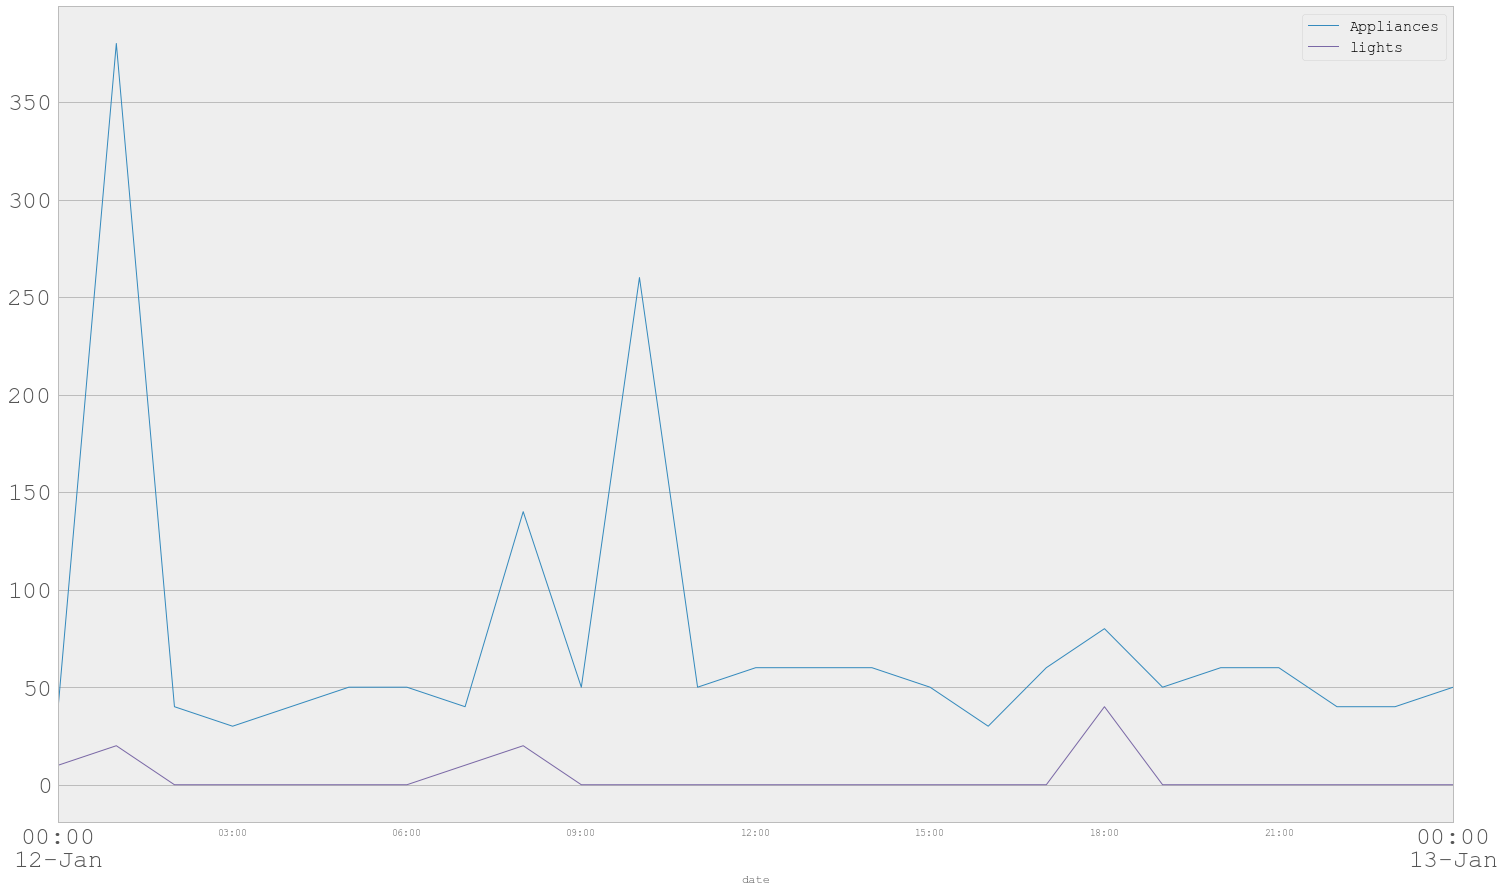

In [25]:
#Graph for Appliance and lights consumed in the period of 24 hours(12-13 Jan)
df = energy.set_index('date')
g1 =df.loc['2016-01-12 00:00:00' : '2016-01-13 00:00:00':6]
g1
g2= g1.loc[:,'Appliances':'lights']
g2
g_plt1= g2.cumsum()

plt.figure()
g2.plot()
fig.set_size_inches(25, 15)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('lineplot.png')

In [26]:
df_1 = energy.set_index('month')
h1 =df_1.loc['1' : '5':180]
h1
col =['Appliances','T_out']
h2= h1.loc[:,col]



h3 = h2.reset_index()
h3

,month,Appliances,T_out
0,1,60,6.6
1,1,40,5.5
2,1,40,3.3
3,1,390,3.9
4,1,80,1.6
5,1,70,-2.3
6,1,40,-4.1
7,1,90,-1.7
8,1,50,2.3
9,1,50,4.1


In [27]:
h3_max = h3.groupby('month').idxmax()
h3_max['type'] = 'max'
h3_min = h3.groupby('month').idxmin()
h3_min['type'] = 'min'

df2 = h3_max.append(h3_min).set_index('type',append=True).stack().rename('index')

df3 = pd.concat([ df2.reset_index().drop('month',axis=1).set_index('index'), h3.loc[df2.values] ], axis=1 )
df3.set_index(['month','level_2','type']).sort_index()
df3


,type,level_2,month,Appliances,T_out
index,,,,,
3,max,Appliances,1,390,3.9
11,max,T_out,1,50,10.6
39,max,Appliances,2,430,3.7
33,max,T_out,2,60,10.8
52,max,Appliances,3,600,7.6
60,max,T_out,3,120,13.7
67,max,Appliances,4,720,11.0
80,max,T_out,4,80,15.4
100,max,Appliances,5,360,13.6


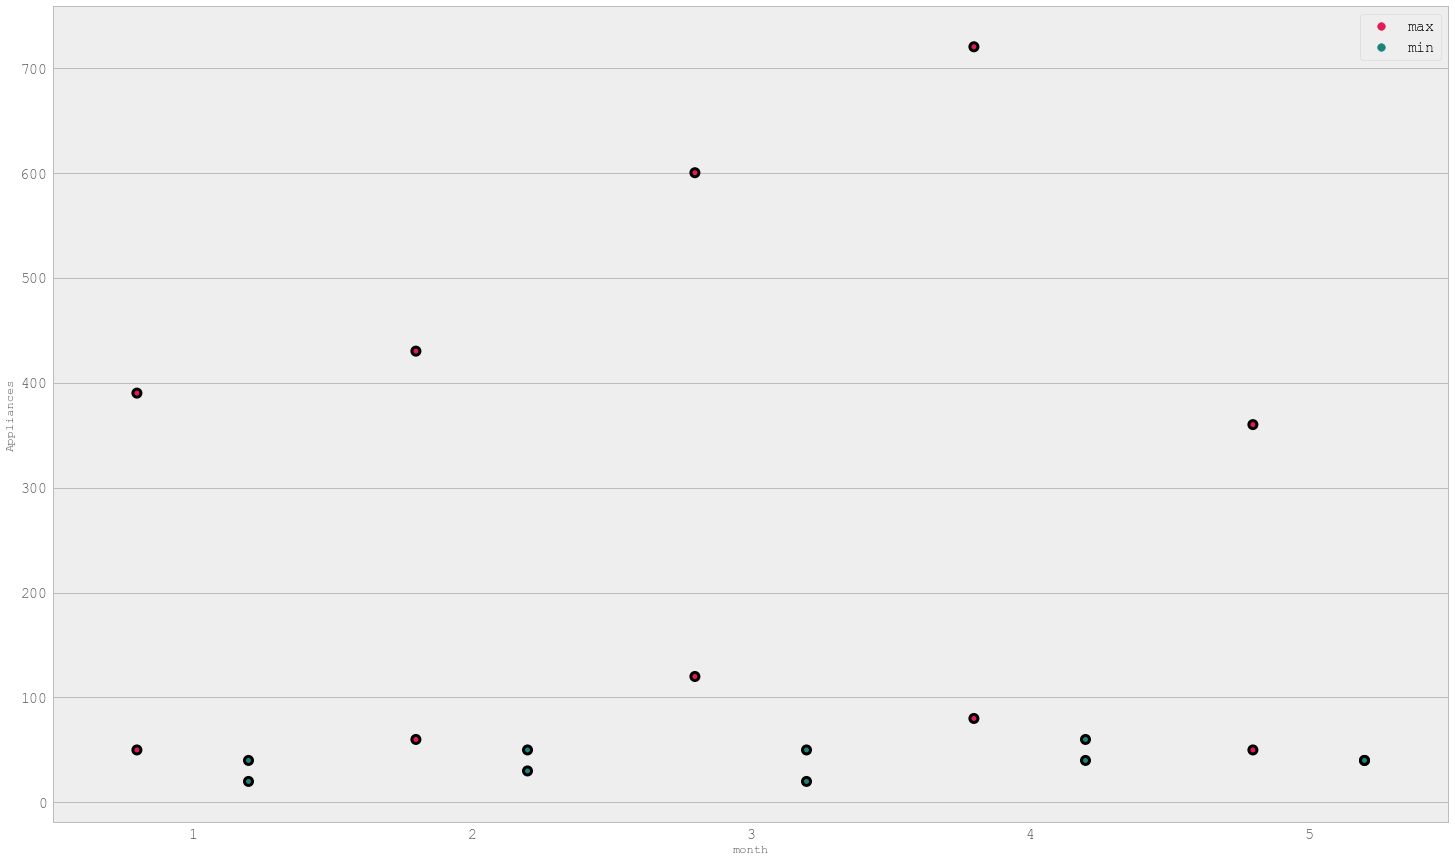

In [28]:
#Getting the max and min for Appliance power in each month
ax = sns.stripplot(x="month", y="Appliances", hue="type", data=df3, dodge=True,  palette=sns.husl_palette(2, l=0.5, s=.95), size=8, linewidth=3,edgecolor='black')
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.legend(loc=1, prop={'size': 15})
plt.show()

ax = plt.gcf()
plt.show()
plt.draw()
ax.savefig('Stripplot.png', dpi=100)

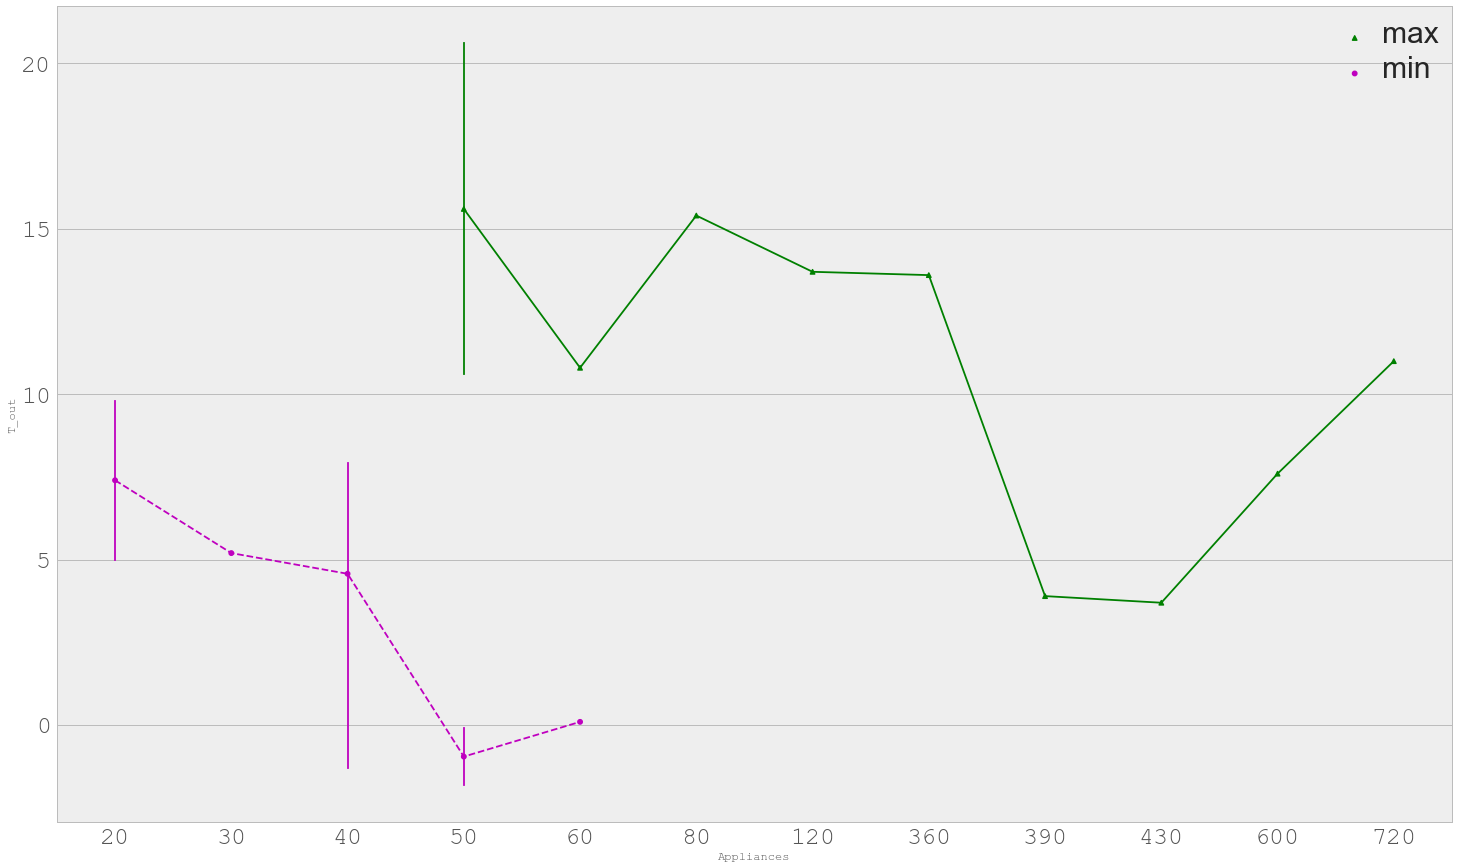

In [29]:
#Plot for getting the min and max of outside temperature and appliance power
p_plot = sns.pointplot(x="Appliances", 
y="T_out", 
hue="type",
data=df3,
palette={"max":"g","min":"m"},
markers=["^","o"],
linestyles=["-","--"])
sns.set_style("whitegrid", {'axes.grid' : False})

plt.xticks(size = 25)
plt.yticks(size = 25)
plt.legend(loc=1, prop={'size': 15})

plt.setp(p_plot.get_legend().get_texts(), fontsize='30') # for legend text
plt.setp(p_plot.get_legend().get_title(), fontsize='32') # for legend title
plt.savefig('pointplot.png')

In [30]:
energy['Week_Number'] = energy['date'].dt.week
energy['Hour'] = energy['date'].dt.hour
energy
new = energy[['Week_Number', 'Appliances', 'weekday','Hour']].copy()

new = new.set_index('Week_Number')
new1 = new.loc[10:11:6]
new1 =new1.reset_index()
new1



,Week_Number,Appliances,weekday,Hour
0,10,40,0,0
1,10,50,0,1
2,10,40,0,2
3,10,20,0,3
4,10,50,0,4
5,10,50,0,5
6,10,30,0,6
7,10,60,0,7
8,10,40,0,8
9,10,60,0,9


Text(0.5,1,'Heatmap of Appliance Power for week 10')

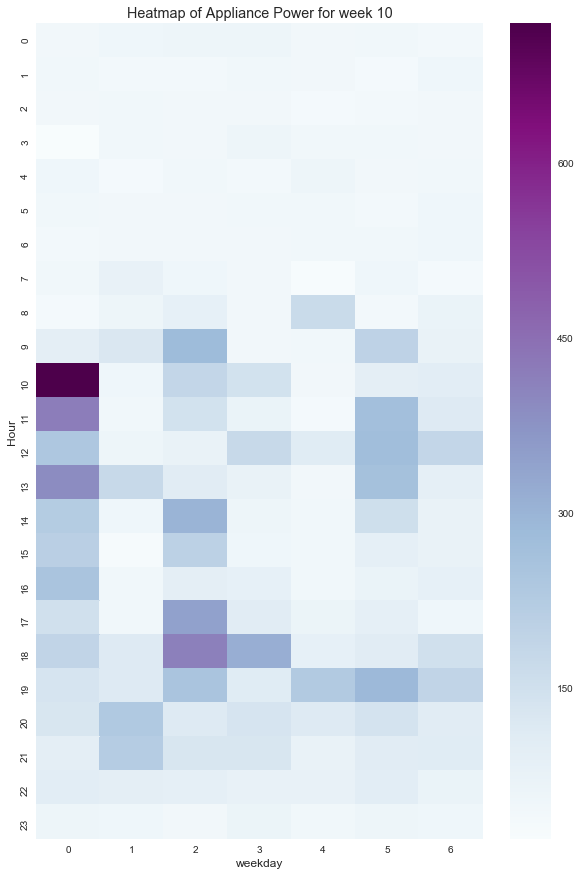

In [31]:
#Heat map for week 10 based on hour of the day, day of the week and power consumed
new1_wide=new1.pivot_table( index='Hour', columns='weekday', values='Appliances')

p2 = plt.figure(figsize=(10,15))
r = sns.heatmap(new1_wide, cmap='BuPu',yticklabels = 1)
r.set_title("Heatmap of Appliance Power for week 10")


As can be clearly seen, there is a strong time component in theenergy consumption pattern. The energy consumption starts to rise around 6 in the morning. Then around noon, there are energy loadsurges. The energy demand also increases around 6 pm. There is no clear pattern regarding the day of the week.

# Part B

In [32]:
energy_time = energy_og[['date', 'Appliances']]
#energy_time=energy_time.set_index('date')
#type(energy_time)
ts = pd.Series(energy_time['Appliances'].values, index=energy_time['date'])

In [37]:
# Using graphical and Dickey-Fuller test to check whether data is stationary or not
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=120)
    rolstd = pd.rolling_std(timeseries, window=120)

    #Plot rolling statistics:
    #orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print( dfoutput)

C:\Users\Abhinav\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\Abhinav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).mean()
  
C:\Users\Abhinav\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=120,center=False).std()
  import sys


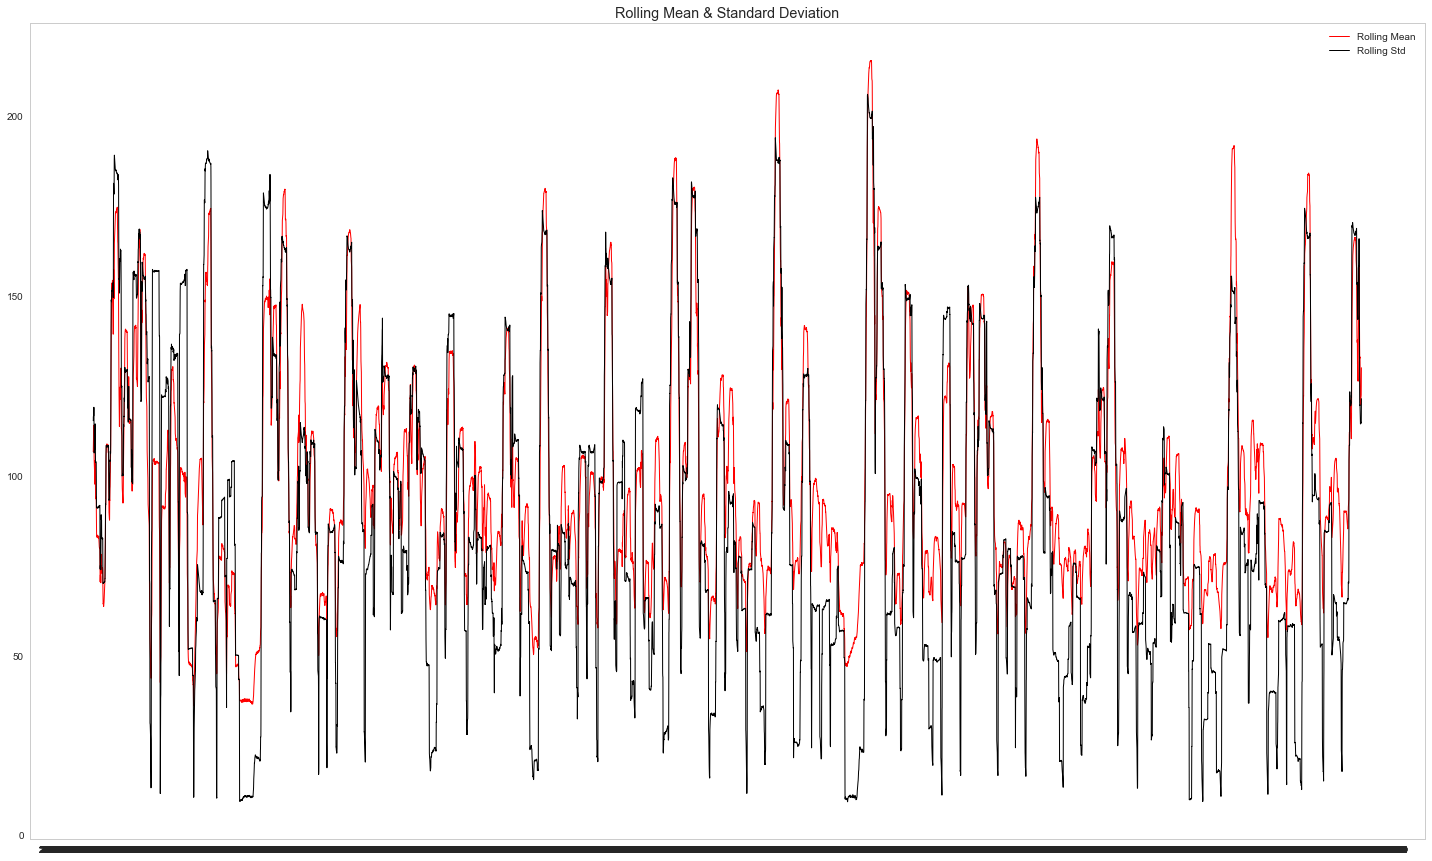

Results of Dickey-Fuller Test:
Test Statistic                   -21.616378
p-value                            0.000000
#Lags Used                        11.000000
Number of Observations Used    19723.000000
Critical Value (1%)               -3.430682
Critical Value (5%)               -2.861687
Critical Value (10%)              -2.566848
dtype: float64


In [205]:
test_stationarity(ts)

The ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [33]:
#categorizing day of the week as weekday or weekend
energy['type_day'] = np.where(energy['weekday'] <= 5 , 'weekday', 'weekend')

In [34]:
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,month,Week_Number,Hour,type_day
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,7.000000,63.000000,5.300000,13.275433,13.275433,0,1,2,17,weekday
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.666667,59.166667,5.200000,18.606195,18.606195,0,1,2,17,weekday
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.333333,55.333333,5.100000,28.642668,28.642668,0,1,2,17,weekday
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.000000,51.500000,5.000000,45.410389,45.410389,0,1,2,17,weekday
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,5.666667,47.666667,4.900000,10.084097,10.084097,0,1,2,17,weekday
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,5.333333,43.833333,4.800000,44.919484,44.919484,0,1,2,17,weekday
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.000000,40.000000,4.700000,47.233763,47.233763,0,1,2,18,weekday
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.166667,40.000000,4.683333,33.039890,33.039890,0,1,2,18,weekday
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.333333,40.000000,4.666667,31.455702,31.455702,0,1,2,18,weekday
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.500000,40.000000,4.650000,3.089314,3.089314,0,1,2,18,weekday


In [40]:

#cols_to_norm = ['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']
#energy[cols_to_norm] = energy[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#energy

In [35]:
#Importing labelencoder and one hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#label encoding weekday and weekend
labelencoder_X = LabelEncoder()
energy['type_day'] = labelencoder_X.fit_transform(energy['type_day'])

#Getting dummy values for day of the week and month
energy = pd.get_dummies(energy, columns=["weekday", "month"], prefix=["day", "month"])
energy.drop('Week_Number',axis=1, inplace=True)

In [36]:
energy.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'Hour', 'type_day', 'day_0',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5'],
      dtype='object')

In [37]:
# X is the features and y is the target
X = energy.drop(['date','Appliances','rv1', 'rv2'], axis= 1)
y = energy.loc[:,  'Appliances']

In [44]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
# The "accuracy" scoring.
lin.fit(X,y)
print('Coefficients: \n', lin.coef_)

Coefficients: 
 [  1.952321    -6.09797661  15.47871892 -18.94794153 -15.19607868
  27.13500467   5.56110111   0.84717023  -0.53489767   0.38329249
   0.09020973   6.88249012   0.24580891  -0.52644619  -1.09433508
   9.29668089  -4.35079715  -9.15794087  -0.07733496  -8.4328538
   0.09443203  -0.48404576   1.58608107   0.16524149   2.48465074
   0.96399269  -1.54828414   3.00720289 -10.90665899  -6.87970079
  -9.35427216  11.24754404  14.43416915  -1.54828414  20.88836157
  -5.8950119   10.30621636  -6.534154   -18.76541203]


In [45]:
X.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Hour',
       'type_day', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5'],
      dtype='object')

In [46]:
X

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,day_2,day_3,day_4,day_5,day_6,month_1,month_2,month_3,month_4,month_5
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,0,0,0,0,0,1,0,0,0,0
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,0,0,0,0,0,1,0,0,0,0
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,0,0,0,0,0,1,0,0,0,0
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,0,0,0,0,0,1,0,0,0,0
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,0,0,0,0,0,1,0,0,0,0
5,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,...,0,0,0,0,0,1,0,0,0,0
6,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,...,0,0,0,0,0,1,0,0,0,0
7,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,...,0,0,0,0,0,1,0,0,0,0
8,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,...,0,0,0,0,0,1,0,0,0,0
9,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,...,0,0,0,0,0,1,0,0,0,0


In [179]:
#Getting f score for feature selection using Kbest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
#X_feat = SelectKBest(f_regression).fit_transform(X, y)
#X_feat

model = SelectKBest(score_func=f_regression,\
                                      k=4)

results = model.fit(X, y)

print (results.scores_)


[  7.99076292e+02   6.08546649e+01   1.47140998e+02   2.88664211e+02
   7.24083194e+01   1.43812455e+02   2.60243942e+01   3.20699643e+01
   5.68130299e+00   7.70780063e+00   9.54444046e-01   2.76909655e+02
   1.37474160e+02   1.31448883e+01   6.12846635e+01   3.09491920e+01
   1.76061071e+02   1.97755919e+00   5.23984346e+01   1.95934202e+02
   2.40433596e+01   4.68470558e+02   1.50924181e+02   1.04712660e-03
   4.65245939e+00   9.73160402e+02   2.33391325e+00   5.83699705e+01
   3.59051103e+01   1.93580745e+01   1.69268892e+01   1.51864724e+01
   2.21212112e+01   2.33391325e+00   1.46009200e-01   5.32679394e+00
   3.01789723e-01   7.50017596e-01   5.56704173e+00]


In [180]:
#Converting the results of fscore to dataframe
test_imp = pd.DataFrame(data=results.scores_)

In [181]:
X.columns


Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'Hour',
       'type_day', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5'],
      dtype='object')

In [182]:
#Putting column names, fscore and pvalues in dataframe
test = pd.DataFrame({'pval':results.pvalues_,'fscore':results.scores_,'cols':X.columns})
#test_imp_pVal.a
test

,cols,fscore,pval
0,lights,799.076292,2.305108e-172
1,T1,60.854665,6.449169e-15
2,RH_1,147.140998,9.639431e-34
3,T2,288.664211,2.784947e-64
4,RH_2,72.408319,1.873022e-17
5,T3,143.812455,5.086416e-33
6,RH_3,26.024394,3.402540e-07
7,T4,32.069964,1.507881e-08
8,RH_4,5.681303,1.715603e-02
9,T5,7.707801,5.503451e-03


In [183]:
test_rf = RandomForestRegressor(n_estimators=20)
test_rf.fit(X, y)
print( "Features sorted by their score:")
print( sorted(zip(map(lambda x: round(x, 4), test_rf.feature_importances_), X.columns), 
             reverse=True))

Features sorted by their score:
[(0.14979999999999999, 'Hour'), (0.058099999999999999, 'T3'), (0.049200000000000001, 'RH_3'), (0.041000000000000002, 'RH_5'), (0.0402, 'Press_mm_hg'), (0.039, 'RH_2'), (0.0361, 'RH_1'), (0.035299999999999998, 'T8'), (0.0332, 'Tdewpoint'), (0.032399999999999998, 'RH_4'), (0.031699999999999999, 'lights'), (0.031399999999999997, 'RH_7'), (0.031099999999999999, 'T5'), (0.031, 'RH_9'), (0.0309, 'T_out'), (0.030700000000000002, 'RH_6'), (0.029700000000000001, 'RH_out'), (0.029399999999999999, 'T2'), (0.029399999999999999, 'RH_8'), (0.026800000000000001, 'T6'), (0.026700000000000002, 'T4'), (0.025999999999999999, 'Windspeed'), (0.024899999999999999, 'T7'), (0.0246, 'Visibility'), (0.023, 'T1'), (0.018599999999999998, 'T9'), (0.0088999999999999999, 'month_1'), (0.0063, 'day_0'), (0.0057000000000000002, 'month_5'), (0.0051000000000000004, 'day_4'), (0.0041000000000000003, 'day_5'), (0.0019, 'day_1'), (0.0018, 'month_4'), (0.0015, 'month_3'), (0.0015, 'day_2'), (0

In [184]:
# Arranging the dataframe in order of fscore
final_data = test.sort_values(by='fscore',ascending=False)
final_data

,cols,fscore,pval
25,Hour,973.160402,1.394061e-208
0,lights,799.076292,2.305108e-172
21,RH_out,468.470558,1.077516e-102
3,T2,288.664211,2.784947e-64
11,T6,276.909655,9.333867e-62
19,T_out,195.934202,2.624854e-44
16,RH_8,176.061071,5.211566e-40
22,Windspeed,150.924181,1.456471e-34
2,RH_1,147.140998,9.639431e-34
5,T3,143.812455,5.086416e-33


In [185]:
#Removing all the columns which have p value less than 0.05
X_pval = final_data.loc[(final_data['pval'] <= 0.05), ['cols','fscore', 'pval']] 
X_pval

,cols,fscore,pval
25,Hour,973.160402,1.394061e-208
0,lights,799.076292,2.305108e-172
21,RH_out,468.470558,1.077516e-102
3,T2,288.664211,2.784947e-64
11,T6,276.909655,9.333867e-62
19,T_out,195.934202,2.624854e-44
16,RH_8,176.061071,5.211566e-40
22,Windspeed,150.924181,1.456471e-34
2,RH_1,147.140998,9.639431e-34
5,T3,143.812455,5.086416e-33


In [210]:
# Columns with p values less than 0.05
X_pval['cols'].unique()

array(['Hour', 'lights', 'RH_out', 'T2', 'T6', 'T_out', 'RH_8',
       'Windspeed', 'RH_1', 'T3', 'RH_6', 'RH_2', 'RH_7', 'T1', 'day_0',
       'RH_9', 'day_1', 'T4', 'T8', 'RH_3', 'Press_mm_hg', 'day_5',
       'day_2', 'day_3', 'day_4', 'T7', 'T5', 'RH_4', 'month_5', 'month_2',
       'Tdewpoint'], dtype=object)

In [38]:
X_final = X[['Hour', 'lights', 'RH_out', 'T2', 'T6', 'T_out', 'RH_8',
       'Windspeed', 'RH_1', 'T3', 'RH_6', 'RH_2', 'RH_7', 'T1', 'day_0',
       'RH_9', 'day_1', 'T4', 'T8', 'RH_3', 'Press_mm_hg', 'day_5',
       'day_2', 'day_3', 'day_4', 'T7', 'T5', 'RH_4', 'month_5', 'month_2',
       'Tdewpoint']].copy()
X_final

,Hour,lights,RH_out,T2,T6,T_out,RH_8,Windspeed,RH_1,T3,...,day_5,day_2,day_3,day_4,T7,T5,RH_4,month_5,month_2,Tdewpoint
0,17,30,92.000000,19.200000,7.026667,6.600000,48.900000,7.000000,47.596667,19.790000,...,0,0,0,0,17.200000,17.166667,45.566667,0,0,5.300000
1,17,30,92.000000,19.200000,6.833333,6.483333,48.863333,6.666667,46.693333,19.790000,...,0,0,0,0,17.200000,17.166667,45.992500,0,0,5.200000
2,17,30,92.000000,19.200000,6.560000,6.366667,48.730000,6.333333,46.300000,19.790000,...,0,0,0,0,17.200000,17.166667,45.890000,0,0,5.100000
3,17,40,92.000000,19.200000,6.433333,6.250000,48.590000,6.000000,46.066667,19.790000,...,0,0,0,0,17.133333,17.166667,45.723333,0,0,5.000000
4,17,40,92.000000,19.200000,6.366667,6.133333,48.590000,5.666667,46.333333,19.790000,...,0,0,0,0,17.200000,17.200000,45.530000,0,0,4.900000
5,17,40,92.000000,19.200000,6.300000,6.016667,48.590000,5.333333,46.026667,19.790000,...,0,0,0,0,17.133333,17.133333,45.730000,0,0,4.800000
6,18,50,92.000000,19.200000,6.263333,5.900000,48.590000,5.000000,45.766667,19.790000,...,0,0,0,0,17.133333,17.100000,45.790000,0,0,4.700000
7,18,50,91.833333,19.200000,6.190000,5.916667,48.590000,5.166667,45.560000,19.730000,...,0,0,0,0,17.100000,17.100000,45.863333,0,0,4.683333
8,18,40,91.666667,19.200000,6.123333,5.933333,48.590000,5.333333,45.597500,19.730000,...,0,0,0,0,17.166667,17.166667,45.790000,0,0,4.666667
9,18,40,91.500000,19.230000,6.190000,5.950000,48.590000,5.500000,46.090000,19.790000,...,0,0,0,0,17.200000,17.100000,46.096667,0,0,4.650000


In [39]:
cols_to_norm = ['lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','T6','RH_6','T7','RH_7','T8','RH_8','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Tdewpoint']
X_svm = X_final[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

X_svm

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T7,RH_7,T8,RH_8,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,0.428571,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.170594,0.653428,0.173329,0.661412,0.677290,0.372990,0.097674,0.894737,0.500000,0.538462
1,0.428571,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.170594,0.651064,0.173329,0.660155,0.678532,0.369239,0.100000,0.894737,0.476190,0.533937
2,0.428571,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.170594,0.646572,0.173329,0.655586,0.676049,0.365488,0.102326,0.894737,0.452381,0.529412
3,0.571429,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.164310,0.641489,0.164175,0.650788,0.671909,0.361736,0.104651,0.894737,0.428571,0.524887
4,0.571429,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.170594,0.639362,0.164175,0.650788,0.671909,0.357985,0.106977,0.894737,0.404762,0.520362
5,0.571429,0.327350,0.522980,0.225345,0.675883,0.215188,0.755569,0.341441,0.771233,0.172320,...,0.164310,0.640426,0.164175,0.650788,0.667357,0.354234,0.109302,0.894737,0.380952,0.515837
6,0.714286,0.327350,0.515824,0.225345,0.675883,0.215188,0.754012,0.341441,0.773794,0.169135,...,0.164310,0.638298,0.164175,0.650788,0.667357,0.350482,0.111628,0.894737,0.357143,0.511312
7,0.714286,0.323830,0.510137,0.225345,0.675883,0.210203,0.754012,0.341441,0.776924,0.169135,...,0.161169,0.638298,0.164175,0.650788,0.667357,0.351018,0.113178,0.892544,0.369048,0.510558
8,0.571429,0.316790,0.511169,0.225345,0.674009,0.210203,0.748871,0.341441,0.773794,0.175506,...,0.167452,0.645390,0.164175,0.650788,0.667357,0.351554,0.114729,0.890351,0.380952,0.509804
9,0.571429,0.323830,0.524723,0.227526,0.673072,0.215188,0.752298,0.341441,0.786883,0.169135,...,0.170594,0.648936,0.164175,0.650788,0.667357,0.352090,0.116279,0.888158,0.392857,0.509050


In [40]:
from sklearn import svm, grid_search
def svr_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [44]:
 svr_param_selection(X_svm, y, 2)

{'C': 10, 'gamma': 1}

In [49]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_svm, y, test_size=0.2, random_state=2)
clf = svm.SVR(C=10,  gamma= 1, kernel='rbf')
clf.fit(X_train3, y_train3) 
svr_pred = clf.predict(X_test3)
svr_score  = sqrt(mean_squared_error(y_test3, svr_pred))
svr_score

90.97070745804282

SVM using radial kernel for grid searched value of c = 10 and gamma = 1 gave RMSE value of 90.97

In [48]:
#Running randomforest regressor on the X_final features
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=2)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [217]:
regr.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)>

In [218]:
predicted_rf = regr.predict(X_test)

In [219]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#getting rmse value of the prediction from random forest regressor
rf_score  = sqrt(mean_squared_error(y_test, predicted_rf))
rf_score

89.95362252615679

Random Forest Regressor gave RMSE value of 89.95

In [220]:
#Importing xgboost and getting xgbregressor
import xgboost as xgb
from xgboost import XGBRegressor

In [221]:
#Training the X_final features using default values using xgbRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y, test_size=0.2, random_state=1)
model = xgb.fit(X_train1,y_train1)

In [222]:
predicted_xgb = xgb.predict(X_test1)

In [224]:
#Getting the rmse of the predicted value
xgb_score  = sqrt(mean_squared_error(y_test1, predicted_xgb))
xgb_score

77.18413144404134

XgBoost RMSE value is 77.18

# RMSE value of xgboost is better than random forest

In [43]:
#Importing gridsearch for grid search to get optimal values of the parameters fir xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [226]:
# grid search
model1 = XGBRegressor()

# setting grid values for learning rate, estimators and max-depth
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]

#Putting the parameters in a dictionary for grid search
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)

#Using kfold cross validation technique where k=10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model1, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [152]:
# summarize results and print the best values for the regressor found using grid search
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.547848 using {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}


The best value for eta is 0.2, max_depth is 8 and estimators is 200, where 0.547 of variance of test set is explained.

In [201]:
xgb1 = XGBRegressor(n_estimators=200, learning_rate= 0.2, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=8)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_final, y, test_size=0.2, random_state=2)
model1 = xgb1.fit(X_train2,y_train2)
cv_xgb = xgb.predict(X_test2)
xgb_score1  = sqrt(mean_squared_error(y_test2, cv_xgb))
xgb_score1

56.56277246063585

Tuned XgBoost RMSE is 56.56

# Value of RMSE has reduced when using optimal values of eta, max_depth and estimators.

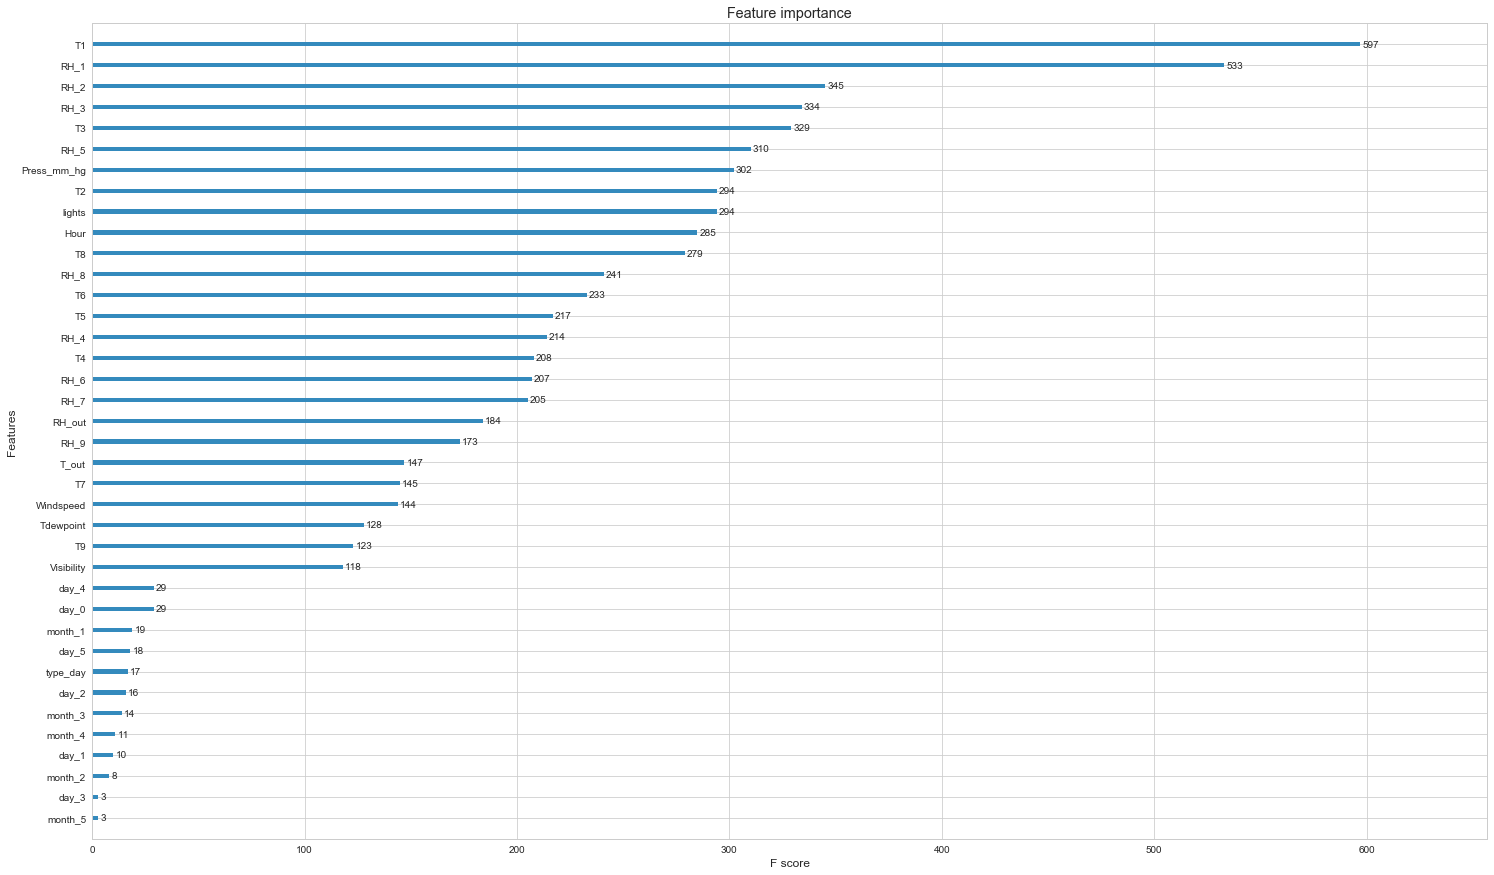

In [195]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

The above graph shows that weather data, selected the atmospheric pressure (which is correlated to wind speed) as the most-relevant weather data variable in the prediction. Therefore, atmospheric pressure may be important to include in energy prediction models and for building performance modeling